## Making Prediction of Wine Quality

## Introduction

Our group decided to download a dataset from the internet to perform a K nearest neighbor classification. Our question we are seeking to answer is what different predictor variables can be utilized to predict the quality of wine. This includes **pH, total sulfur dioxide, alcohol, residual sugar, chlorides, density and citric acid**. All the predictors are displayed in a scatterplot matrix and the correlations are analyzed. In this exploratory analysis we determine the best number of neighbors that will allow us to make the most accurate prediction to be 10. Using this number we concluded the 4 best predictors that gave the most accurate quality prediction are alcohol, citric acid, chlorides, and total sulfur dioxide. 

The following study can be found here: https://www.sciencedirect.com/science/article/pii/S0167923609001377?via=ihub The dataset we will be using is https://www.kaggle.com/yasserh/wine-quality-dataset. The dataset has been made tidy for better comprehension and is included below.

## Method and Results

To do an exploratory analysis of our data set and answer our predictive question, we decided to perform a knn classification. By doing so we are able to determine the best number of neighbors that should be used to result in the most accurate categorical prediction. We began by loading our data from the original source from the internet and reading the data frame in Juptyer. The data was then cleaned to display only desired columns and rows using select and mutate, such that important information was kept and organized properly, and any information that was not needed was discarded. We ensured to name all the columns and convert to a factor. 

The predictors we kept were total.sulfur.dioxide, pH, alcohol, residual.sugar, chlorides, density, and citric.acid. We then set a seed to ensure our work was reproducible. 

The next step in our analysis was to randomly split the data into a training and testing set. This allowed us to work with 75% of the data set (training) without being biased. We could then compare our results to the remaining 25% of the data set (testing) that was not manipulated. The training data was then displayed in a scatterplot matrix to show correlations. 

We then created a subset of the data without the column “Quality” to allow for more objective analysis. A crucial next set was setting our seed to ensure our work would be reproducible. It could then be processed. Beginning with creating a model specification with engine ‘kknn’ and mode “classification”. The data then underwent a 5 fold cross validation. This ensures a more accurate representation of the training data. We then created a recipe and processed the data so it was centered and scaled. This is important to ensure all variables have equal weighting on the final prediction. Finally the data was tuned and the accuracy was collected. We then created a line graph using ggplot of the accuracy of the training data to determine the best number of neighbors which is 10. Using this number of neighbors and forward selection in the testing data, the best group of predictors was calculated and determined to be alcohol, citric acid, chlorides and total sulfur dioxide. Finally, we produced a confusion matrix to evaluate our analysis.

In [1]:
# Loading package
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
# Import dataset
url <- "https://raw.githubusercontent.com/SurajDatta/DSCI100_group_project/main/data/WineQT.csv"
wine_data <- read_csv(url)
colnames(wine_data) <- make.names(colnames(wine_data))

wine_data_clean <- wine_data %>%
     select(total.sulfur.dioxide, pH, alcohol, quality, residual.sugar, chlorides, density, citric.acid) %>%
     mutate(quality = as_factor(quality))
head(wine_data_clean)
nrow(wine_data_clean)


Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_double(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_double(),
  Id = col_double()
)



total.sulfur.dioxide,pH,alcohol,quality,residual.sugar,chlorides,density,citric.acid
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
34,3.51,9.4,5,1.9,0.076,0.9978,0.00
67,3.20,9.8,5,2.6,0.098,0.9968,0.00
54,3.26,9.8,5,2.3,0.092,0.9970,0.04
60,3.16,9.8,6,1.9,0.075,0.9980,0.56
34,3.51,9.4,5,1.9,0.076,0.9978,0.00
40,3.51,9.4,5,1.8,0.075,0.9978,0.00


[1] 1143

|Variable             |Explanation                                                                       |
|---------------------|----------------------------------------------------------------------------------|
|total.sulfur.dioxide |The total amount of sulfur dioxide in wine.                                       |
|pH                   |Measure of how acidic/basic wine is.                                              | 
|alcohol              |The alchohol amount in wine.                                                      |
|quality              |The quality of wine.                                                              |
|residual.sugar       |The residual sugar in the wine after the sugar fermentation carried out by yeasts.|
|chlorides            |The chlorides amount in wine.                                                     |
|density              |The density of wine.                                                              |      
|citric.acid          |The amount of citric acid in wine.                                                |


***Table 1: List of Potential Predicors.***

This table lists the variables used to assess the quality of the wine as well as a discription for each. Each of these variables have some relationship with the qualit of wine and have potential to predict the bets wine on a given scale.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



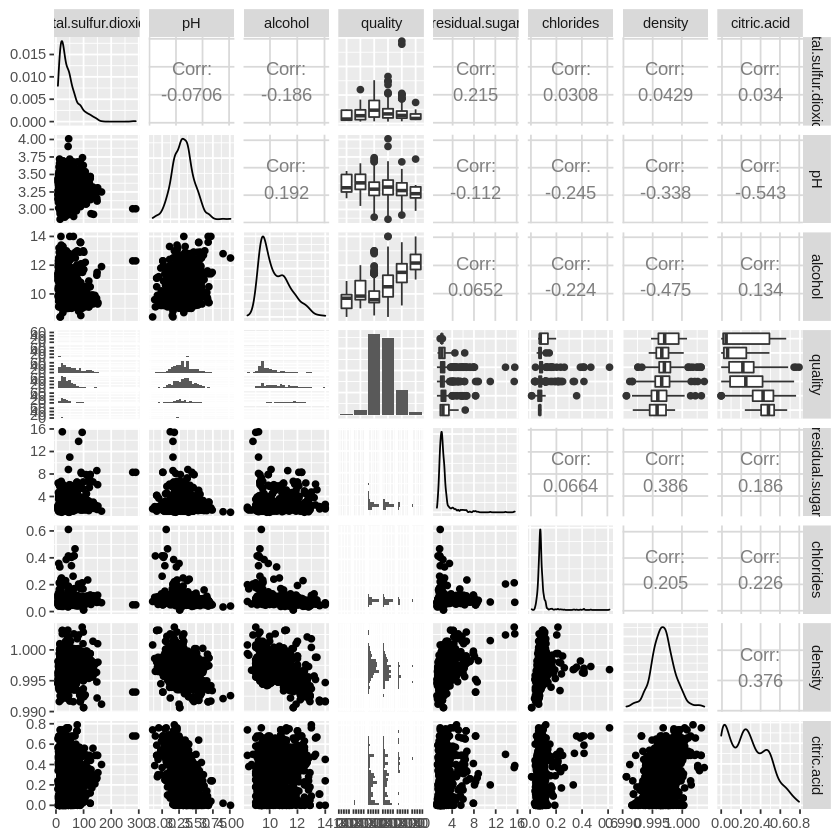

In [3]:
# data split
wine_split <- initial_split(wine_data_clean, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split)

wine_ggpairs <- wine_train %>%
   ggpairs
wine_ggpairs

***GGpair plot***

caption: The ggpair plots of seven different data and quality shows that the *residue sugar* and *chlorides* have slightly lower corelation with quality, indicating these two variables are not suitable to be predictors.

#### Removing *residue sugar* and *chlorides*
Making a `wine_subset` without *residue sugar* and *chlorides*

In [4]:
wine_subset <- wine_train %>%
  select(total.sulfur.dioxide, pH, alcohol, quality, residual.sugar, chlorides, density, citric.acid)

names <- colnames(wine_subset %>% select(-quality))

wine_subset

total.sulfur.dioxide,pH,alcohol,quality,residual.sugar,chlorides,density,citric.acid
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
34,3.51,9.4,5,1.9,0.076,0.9978,0.00
67,3.20,9.8,5,2.6,0.098,0.9968,0.00
54,3.26,9.8,5,2.3,0.092,0.9970,0.04
60,3.16,9.8,6,1.9,0.075,0.9980,0.56
34,3.51,9.4,5,1.9,0.076,0.9978,0.00
40,3.51,9.4,5,1.8,0.075,0.9978,0.00
21,3.39,10.0,7,1.2,0.065,0.9946,0.00
65,3.28,9.2,5,1.8,0.097,0.9959,0.08
59,3.58,9.9,5,1.6,0.089,0.9943,0.00


### The KNN classification model is for predictors with the predicted quality. 
We will use `for_loop` on each predictor to simplify the steps. 
The results will show in the table with 3 columns: **predictor**, **best k value**, and **accuracy**.

In [5]:
set.seed(4321) 

# create an empty tibble to store the results
accuracies <- tibble(size = integer(), 
                     model_string = character(), 
                     accuracy = numeric())

# create a model specification
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
     set_engine("kknn") %>%
     set_mode("classification")

# create a 5-fold cross-validation object
wine_vfold <- vfold_cv(wine_subset, v = 5, strata = quality)

# store the total number of predictors
n_total <- length(names)

# stores selected predictors
selected <- c()

# for every size from 1 to the total number of predictors
for (i in 1:n_total) {
    # for every predictor still not added yet
    accs <- list()
    models <- list()
    for (j in 1:length(names)) {
        # create a model string for this combination of predictors
        preds_new <- c(selected, names[[j]])
        model_string <- paste("quality", "~", paste(preds_new, collapse="+"))

        # create a recipe from the model string
        wine_recipe <- recipe(as.formula(model_string), 
                                data = wine_subset) %>%
                          step_scale(all_predictors()) %>%
                          step_center(all_predictors())

        # tune the KNN classifier with these predictors, 
        # and collect the accuracy for the best K
        acc <- workflow() %>%
          add_recipe(wine_recipe) %>%
          add_model(knn_spec) %>%
          tune_grid(resamples = wine_vfold, grid = 10) %>%
          collect_metrics() %>%
          filter(.metric == "accuracy") %>%
          summarize(mx = max(mean))
        acc <- acc$mx %>% unlist()

        # add this result to the dataframe
        accs[[j]] <- acc
        models[[j]] <- model_string
    }
    jstar <- which.max(unlist(accs))
    accuracies <- accuracies %>% 
      add_row(size = i, 
              model_string = models[[jstar]], 
              accuracy = accs[[jstar]])
    selected <- c(selected, names[[jstar]])
    names <- names[-jstar]
}

accuracies

! Fold3: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold3: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold3: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold3: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold3: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold3: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold4: internal: No observations were detected in `t

size,model_string,accuracy
<int>,<chr>,<dbl>
1,quality ~ alcohol,0.5156347
2,quality ~ alcohol+citric.acid,0.5679701
3,quality ~ alcohol+citric.acid+pH,0.5657862
4,quality ~ alcohol+citric.acid+pH+residual.sugar,0.5715727
5,quality ~ alcohol+citric.acid+pH+residual.sugar+density,0.5633999
6,quality ~ alcohol+citric.acid+pH+residual.sugar+density+chlorides,0.5506415
7,quality ~ alcohol+citric.acid+pH+residual.sugar+density+chlorides+total.sulfur.dioxide,0.5436174


***Table 2: Table of Accuracies of Different Combination of Predictors***



### To visualize of accuracies of predictors

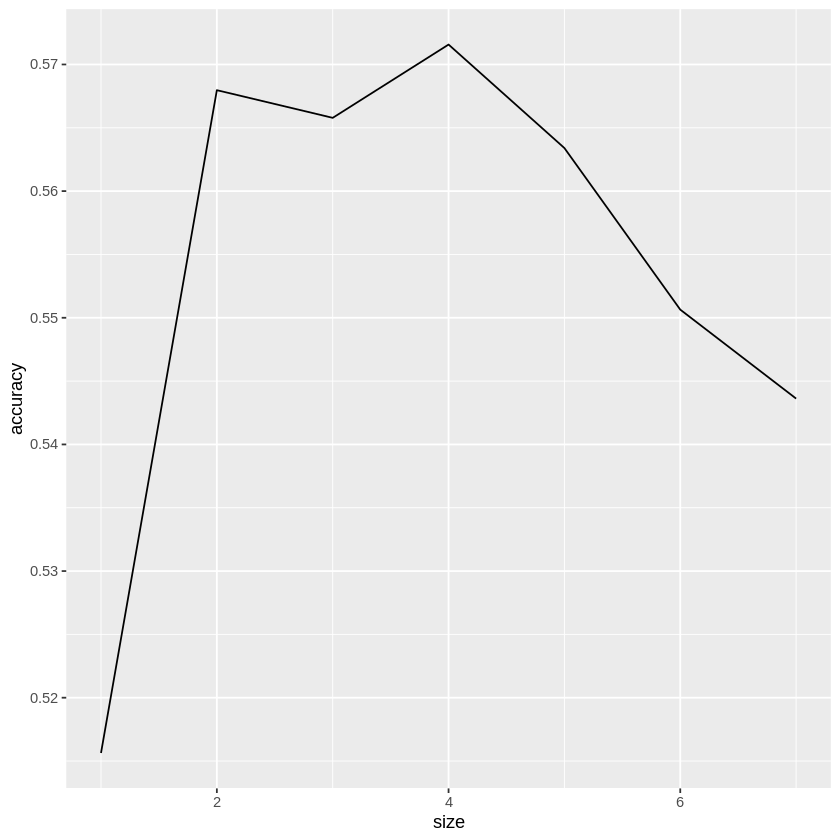

In [6]:
set.seed(4321)  

accuracy_plot <- accuracies %>%
ggplot(aes(x = size, y = accuracy))+
geom_line()

accuracy_plot

### To get the best k for the predictors

! Fold3: internal: No observations were detected in `truth` for level(s): '3'
Com...

! Fold4: internal: No observations were detected in `truth` for level(s): '3'
Com...



neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.5354903,5,0.018742019,Model01
1,roc_auc,hand_till,0.5802297,5,0.018920260,Model01
3,accuracy,multiclass,0.5168843,5,0.017673363,Model02
3,roc_auc,hand_till,0.6084952,5,0.019089709,Model02
4,accuracy,multiclass,0.5075411,5,0.016462605,Model03
4,roc_auc,hand_till,0.6070441,5,0.018263433,Model03
6,accuracy,multiclass,0.5284725,5,0.017962809,Model04
6,roc_auc,hand_till,0.6028254,5,0.015102873,Model04
7,accuracy,multiclass,0.5225711,5,0.014309808,Model05


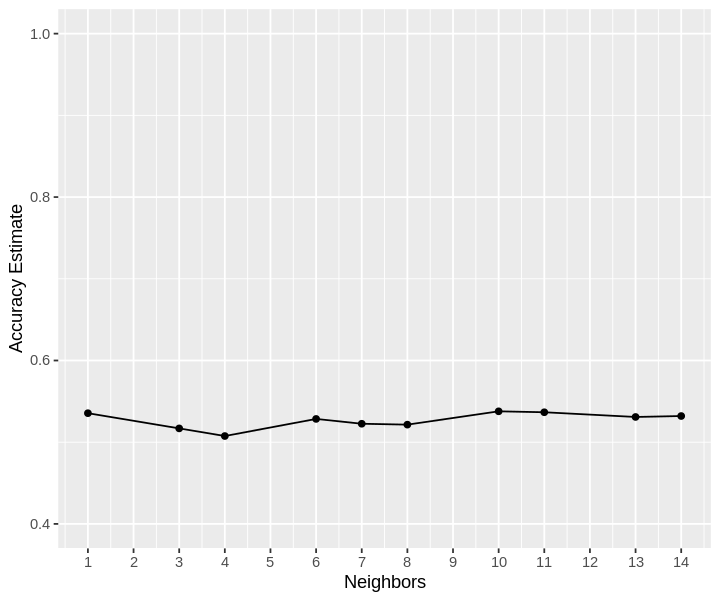

In [7]:
set.seed(4321) 

options(repr.plot.height = 5, repr.plot.width = 6)

wine_train_recipe <- recipe(quality ~ alcohol + citric.acid + chlorides + total.sulfur.dioxide,
                            data = wine_train)

wine_selected <- wine_train %>%
select(alcohol, citric.acid, chlorides, total.sulfur.dioxide, quality)

knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
      set_engine("kknn") %>%
      set_mode("classification")

wine_vfold <- vfold_cv(wine_selected, v = 5, strata = quality)

knn_results <- workflow() %>%
      add_recipe(wine_train_recipe) %>%
      add_model(knn_tune) %>%
      tune_grid(resamples = wine_vfold, grid = 10) %>%
      collect_metrics()

knn_results

accuracies <- knn_results %>% 
      filter(.metric == "accuracy")

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 14, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis

cross_val_plot

***Figure 1*** 

In the knn classification model of combined alcohol, citric.acid, chlorides, and total.sulfur.dioxidehe, the accuracy vs k as shown above. 

In [8]:
set.seed(4321) 

accuracies_highest <- accuracies %>%filter(.metric == "accuracy") %>%
         arrange(desc(mean)) %>%
         slice(1)

accuracies_highest

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
10,accuracy,multiclass,0.5377824,5,0.00931037,Model07


***Table3: The best k for predictors*** 

Refer to the line graph above, the k of the best accuracy of the combined alcohol, citric.acid, chlorides, and total.sulfur.dioxide is 10 as shown in the table above.

In [12]:
# Set the seed. Don't remove this!
set.seed(4321) 

wine_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) %>%
      set_engine("kknn") %>%
      set_mode("classification")

wine_fit <- workflow() %>%
      add_recipe(wine_train_recipe) %>%
      add_model(wine_knn_spec) %>%
      fit(data = wine_train)

#wine_fit

wine_predictions <- predict(wine_fit, wine_test) %>%
bind_cols(wine_test)

wine_predictions

.pred_class,total.sulfur.dioxide,pH,alcohol,quality,residual.sugar,chlorides,density,citric.acid
<fct>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
5,59,3.30,9.4,5,1.6,0.069,0.9964,0.06
5,18,3.36,9.5,7,2.0,0.073,0.9968,0.02
6,71,3.52,9.7,5,2.3,0.082,0.9982,0.31
5,67,3.17,9.4,5,2.3,0.084,0.9968,0.11
5,11,3.28,9.5,5,1.8,0.080,0.9962,0.24
5,16,3.38,9.8,6,2.0,0.082,0.9964,0.00
5,82,3.35,10.1,5,2.4,0.089,0.9958,0.07
5,18,3.40,9.6,6,5.5,0.086,0.9986,0.00
6,65,3.90,13.1,4,2.1,0.054,0.9934,0.15


***Table 4: Predicted Quality***

Using the **knn classification model**, the quality predicted from the values of the testing data is shown in **Table 4**.

In [13]:
wine_metrics <- wine_predictions %>%
metrics(truth = quality, estimate = .pred_class)

wine_metrics

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.5633803
kap,multiclass,0.3141165


###### ***Table 5: Accuracy of the Classifier***

The classifier's accuracy is 0.5633803 as shown in **Table 5**.

In [14]:
wine_conf_mat <- wine_predictions %>%
    conf_mat(truth = quality, estimate = .pred_class)

wine_conf_mat

          Truth
Prediction  3  4  5  6  7  8
         3  0  0  0  0  0  0
         4  0  0  0  0  0  0
         5  1  6 77 28  4  0
         6  0  7 38 66 12  3
         7  0  0  3 19 17  3
         8  0  0  0  0  0  0

***Table 6: Confusion Matrix***

A confusion matrix shown above present that there are 0 correct prediction of the quality in 3, 4, and 8, and 66 correct predictions in quality 6, 77 correct predictions in quality 5, 17 correct predictions in quality 7.

## Discussion

After determining the best number of neighbors to be 9, we concluded that the best predictors to determine the quality of wine are alcohol, citric acid, chlorides and total sulfur dioxide.This correlates with what we expected to find, as they showed strong correlations in the scatterplot matrix we produced at the beginning of our analysis. The impacts of these findings can be used to determine the features of wine that produce the most appealing taste to consumers. As well as what should be considered when it comes to the preservation of the wine. Some future questions that can be asked is if these results can be generalized world wide, or if they would differ in different geographical regions where other predicting variables may play a larger role.

## Reference

- R Core Team. 2021. R: A Language and Environment for Statistical Computing. R Foundation for Statistical Computing. https://www.R-project.org/

- Cortez, P., Cerdeira, A., Almeida, F., Matos, T., & Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547–553. https://doi.org/10.1016/j.dss.2009.05.016

- Wine Quality Dataset. (2022, January 15). Kaggle. https://www.kaggle.com/datasets/yasserh/wine-quality-dataset